# Twitter bot Detection
## -Aayush Tyagi 2013206

In [697]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [698]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import random

In [699]:

def Performance(actual_value , predicted_value):
    accuracy = accuracy_score(actual_value , predicted_value) * 100
    precision = precision_score(actual_value , predicted_value) * 100
    recall = recall_score(actual_value , predicted_value) * 100
    f1 = f1_score(actual_value , predicted_value, average='weighted')
    print('Accuracy is {:.4f}%\n Precision is {:.4f}%\n Recall is {:.4f}%\nF1 Score is {:.4f}\n'.format(accuracy, precision, recall, f1))

In [700]:
# Set Data
training_data = pd.read_csv("training_data_2_csv_UTF.csv")

In [701]:
training_data.columns

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')

In [702]:
training_data.head(10)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,False,Keri Nelson,1
2,4.303727e+09,4303727112,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,1
3,3.063139e+09,3063139353,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,False,single cell papers,1
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,False,lucarivera16,1
5,8.410000e+17,8.41E+17,dantheimprover,"Austin, TX",Just a guy trying to do good by telling everyo...,NaN,1,186,0,13/03/2017 22:53,0,False,11,en,Status(_api=<tweepy.api.API object at 0x101927...,True,False,True,dantheimprover,1
6,2.482835e+09,2482834658,_all_of_us_,in a machine.,bot by @rubicon,NaN,193,0,19,Wed May 07 22:29:25 +0000 2014,0,False,6068,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,everything always,1
7,3.333574e+09,3333573622,KatamariItems,NaN,[Bot rolled up by @BeachEpisode] Cataloguing e...,NaN,8227,2,89,Thu Jun 18 22:07:31 +0000 2015,26,False,2597,en,"{u'contributors': None, u'truncated': False, u...",True,False,False,Katamari Collection,1
8,2.996105e+09,2996105102,AutophagyPapers,NaN,Twitterbot for #Autophagy papers. Curated by @...,NaN,275,0,17,1/25/2015 17:34,23,False,9922,en,Feeding Schedule And Proteolysis Regulate Auto...,False,False,False,Autophagy Papers,1
9,3.271096e+09,3271095818,HSC_papers,NaN,NaN,NaN,51,3,9,7/7/2015 15:23,0,False,2515,en,Functional Selectivity in Cytokine Signaling R...,True,False,False,Hematopoiesis,1


In [703]:
training_data.describe()

,id,followers_count,friends_count,listed_count,favourites_count,statuses_count,bot
count,2.797000e+03,2.797000e+03,2.797000e+03,2797.000000,2797.000000,2.797000e+03,2797.000000
mean,1.482460e+17,9.964245e+05,4.796493e+03,3192.299964,2035.577047,1.945170e+04,0.472292
std,3.100578e+17,5.593714e+06,5.619217e+04,17283.423291,16073.463967,1.543729e+05,0.499321
min,3.526000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,6.895649e+07,4.400000e+01,1.100000e+01,1.000000,0.000000,1.660000e+02,0.000000
50%,1.917035e+09,3.430000e+02,1.840000e+02,17.000000,25.000000,2.240000e+03,0.000000
75%,3.326332e+09,1.372500e+04,6.690000e+02,332.000000,491.000000,1.004200e+04,1.000000
max,8.410000e+17,9.632156e+07,2.056668e+06,620331.000000,714021.000000,6.863363e+06,1.000000


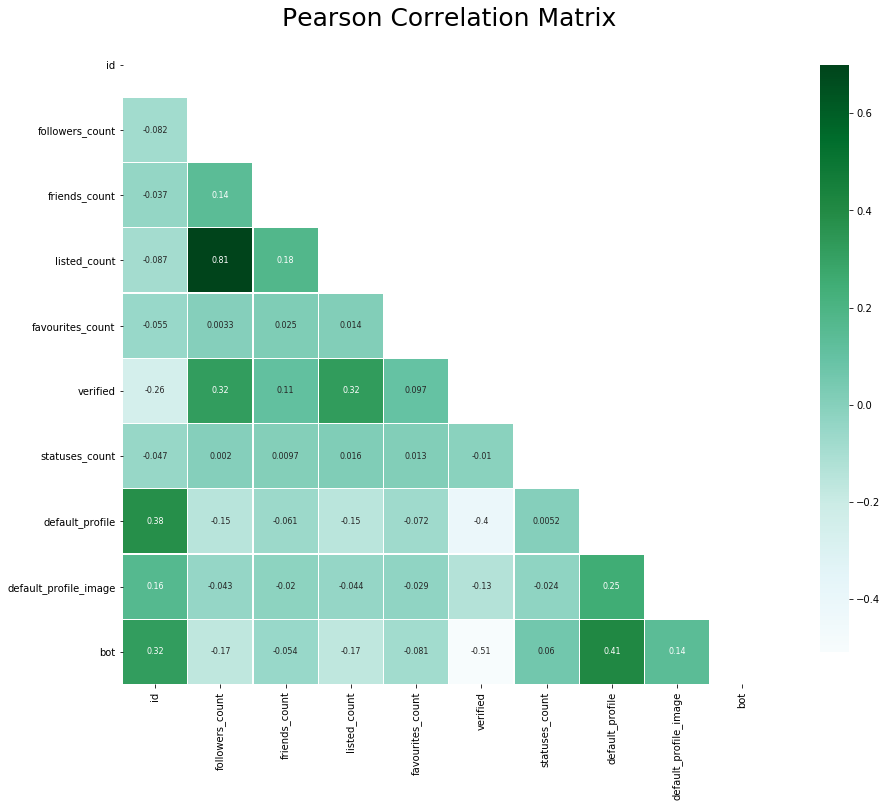

In [704]:
features = ['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot']

mask = np.zeros_like(training_data[features].corr(), dtype = np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(training_data[features].corr(),linewidths = 0.25,vmax = 0.7,square = True,cmap = "BuGn", 
            linecolor = 'w',annot = True,annot_kws = {"size":8},mask = mask,cbar_kws = {"shrink": 0.9})

In [705]:
training_data.drop(['id_str', 'screen_name', 'location', 'description', 'url', 'created_at', 'lang', 'status','default_profile', 'default_profile_image', 'has_extended_profile','name'],axis=1,inplace=True)

In [706]:
training_data.head(5)

,id,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,bot
0,8.160000e+17,1291,0,10,0,False,78554,1
1,4.843621e+09,1,349,0,38,False,31,1
2,4.303727e+09,1086,0,14,0,False,713,1
3,3.063139e+09,33,0,8,0,False,676,1
4,2.955142e+09,11,745,0,146,False,185,1


In [707]:
training_data.isna().sum()

id                  0
followers_count     0
friends_count       0
listed_count        0
favourites_count    0
verified            0
statuses_count      0
bot                 0
dtype: int64

In [708]:
training_data.shape

(2797, 8)

In [709]:
training_data.corr(method='spearman')

,id,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,bot
id,1.000000,-0.672925,-0.402346,-0.615005,-0.439430,-0.611899,-0.451945,0.652131
followers_count,-0.672925,1.000000,0.375522,0.896126,0.457363,0.709732,0.649117,-0.468430
friends_count,-0.402346,0.375522,1.000000,0.204403,0.641529,0.356452,0.111118,-0.483105
listed_count,-0.615005,0.896126,0.204403,1.000000,0.349059,0.694340,0.684976,-0.318445
favourites_count,-0.439430,0.457363,0.641529,0.349059,1.000000,0.394227,0.295108,-0.526228
verified,-0.611899,0.709732,0.356452,0.694340,0.394227,1.000000,0.333278,-0.508555
statuses_count,-0.451945,0.649117,0.111118,0.684976,0.295108,0.333278,1.000000,-0.089018
bot,0.652131,-0.468430,-0.483105,-0.318445,-0.526228,-0.508555,-0.089018,1.000000


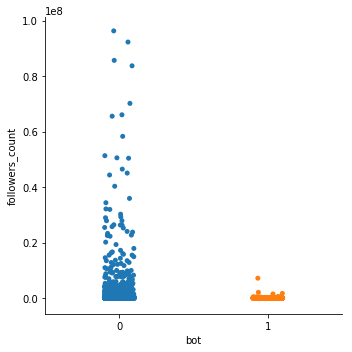

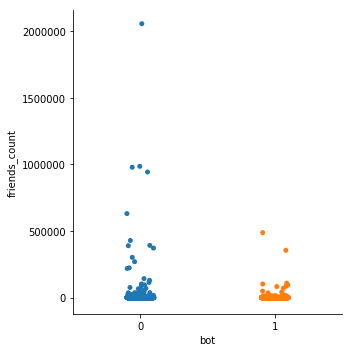

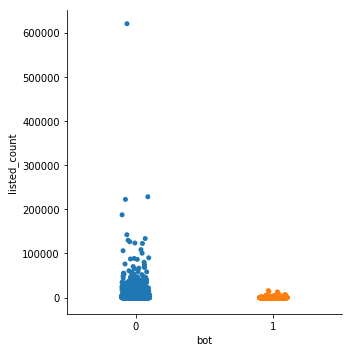

In [710]:
sns.catplot(x="bot", y="followers_count", data=training_data);
sns.catplot(x="bot", y="friends_count", data=training_data);
sns.catplot(x="bot", y="listed_count", data=training_data);

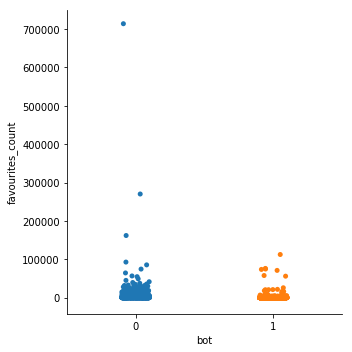

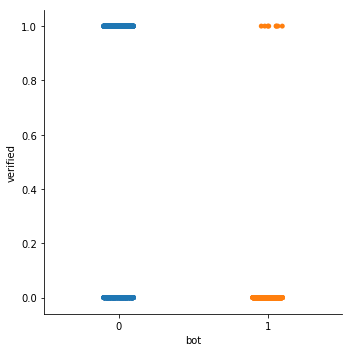

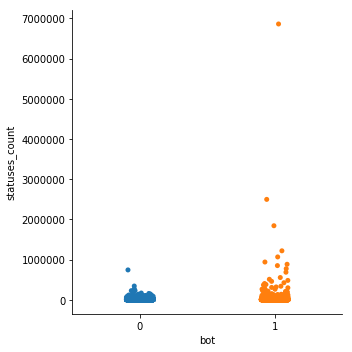

In [711]:
sns.catplot(x="bot", y="favourites_count", data=training_data);
sns.catplot(x="bot", y="verified", data=training_data);
sns.catplot(x="bot", y="statuses_count", data=training_data);

In [712]:
X = training_data.iloc[:, :-1].values
y = training_data.iloc[:, 7].values

In [713]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
Labelx=LabelEncoder()
X[:,5]=Labelx.fit_transform(X[:,5])
print(X)

[[8.16e+17 1291 0 ... 0 0 78554]
 [4843621225.0 1 349 ... 38 0 31]
 [4303727112.0 1086 0 ... 0 0 713]
 ...
 [15485441.0 45044433 7451 ... 24 1 9606]
 [751386872.0 16 64 ... 15 0 62]
 [19929362.0 22490 308 ... 43 1 1897]]


# Random Forest

In [714]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [715]:
#fitting
from sklearn.ensemble import RandomForestClassifier as rf
classifier= rf(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [716]:
bots = training_data[training_data.bot==1]

In [717]:
B = bots.iloc[:,:-1]
B_y = bots.iloc[:,7]

In [718]:
B_pred = classifier.predict(B)

In [719]:
#Confusionmatrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(B_y,B_pred)

In [720]:
print(cm)

[[  0   0]
 [528 793]]


In [721]:
Performance(B_y,B_pred)

Accuracy is 60.0303%
 Precision is 100.0000%
 Recall is 60.0303%
F1 Score is 0.7502



In [722]:
nbots = training_data[training_data.bot==0]
NB = nbots.iloc[:,:-1]
NB_y = nbots.iloc[:,7]

In [723]:
NB_pred = classifier.predict(NB)

In [724]:
print(cm)

[[  0   0]
 [528 793]]


In [725]:
Performance(NB_pred,NB_y)

Accuracy is 61.2466%
 Precision is 0.0000%
 Recall is 0.0000%
F1 Score is 0.4653



# Decision Tree Regression

In [726]:
from sklearn.tree import DecisionTreeRegressor as DTR
classifier= DTR(random_state=0)
classifier.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [727]:
B_pred = classifier.predict(B)

In [728]:
#Confusionmatrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(B_y,B_pred)
print(cm)

[[   0    0]
 [1313    8]]


In [729]:
Performance(B_y,B_pred)

Accuracy is 0.6056%
 Precision is 100.0000%
 Recall is 0.6056%
F1 Score is 0.0120



In [730]:
NB_pred = classifier.predict(NB)

In [731]:
#Confusionmatrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(NB_y,NB_pred)
print(cm)

[[831 645]
 [  0   0]]


In [732]:
Performance(NB_y,NB_pred)

Accuracy is 56.3008%
 Precision is 0.0000%
 Recall is 0.0000%
F1 Score is 0.7204



# 

In [733]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear', random_state=0)
classifier.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [695]:
print(result)

                 0           1       2        3       4    5        6    7
0     8.160000e+17      1291.0     0.0     10.0     0.0  0.0  78554.0  1.0
1     4.843621e+09         1.0   349.0      0.0    38.0  0.0     31.0  1.0
2     4.303727e+09      1086.0     0.0     14.0     0.0  0.0    713.0  1.0
3     3.063139e+09        33.0     0.0      8.0     0.0  0.0    676.0  1.0
4     2.955142e+09        11.0   745.0      0.0   146.0  0.0    185.0  1.0
...            ...         ...     ...      ...     ...  ...      ...  ...
2792  2.362091e+08     18998.0  2005.0    425.0  2503.0  0.0   3498.0  0.0
2793  2.545039e+08        32.0    54.0      0.0     1.0  0.0     97.0  0.0
2794  1.548544e+07  45044433.0  7451.0  68157.0    24.0  1.0   9606.0  0.0
2795  7.513869e+08        16.0    64.0      1.0    15.0  0.0     62.0  0.0
2796  1.992936e+07     22490.0   308.0   1342.0    43.0  1.0   1897.0  0.0

[2797 rows x 8 columns]


In [696]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import tree, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline